In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GhazalDataset.zip

In [ ]:
!pip install hazm

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./GhazalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,ای باد بی‌آرام ما با گل بگو پیغام ما کای گل گ...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکاف...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ا...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سف...,saadi
2427,چه دل‌ها بردی ای ساقی به ساق فتنه‌انگیزت دریغ...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت اب...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که...,saadi


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,ای باد بی آرام ما با گل بگو پیغام ما کای گل گر...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکافا...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ام...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ م...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن خ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سفر...,saadi
2427,چه دل ها بردی ای ساقی به ساق فتنه انگیزت دریغا...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت ابر...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که ...,saadi


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,ای باد بی آرام ما با گل بگو پیغام ما کای گل گر...,moulavi,2
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکافا...,moulavi,2
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ام...,moulavi,2
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ م...,moulavi,2
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن خ...,moulavi,2
...,...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سفر...,saadi,3
2427,چه دل ها بردی ای ساقی به ساق فتنه انگیزت دریغا...,saadi,3
2428,دوش دور از رویت ای جان جانم از غم تاب داشت ابر...,saadi,3
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که ...,saadi,3


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt')

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi
...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi


In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Embedding, GRU, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['poem'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21178 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['poem'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2431, 256)


In [ ]:
Y = pd.get_dummies(df['poet']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2431, 5)


array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.1, random_state=1, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_val.shape,Y_val.shape)

(1944, 256) (1944, 5)
(49, 256) (49, 5)
(438, 256) (438, 5)


In [ ]:
gru_model = Sequential()
gru_model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(5, activation = 'softmax'))
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1000000   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 1,088,965
Trainable params: 1,088,965
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 32

history = gru_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
55/55 [==============================] - 29s 361ms/step - loss: 1.4861 - accuracy: 0.4254 - val_loss: 0.9502 - val_accuracy: 0.7692
Epoch 2/10
55/55 [==============================] - 10s 173ms/step - loss: 0.4890 - accuracy: 0.8067 - val_loss: 0.3450 - val_accuracy: 0.8667
Epoch 3/10
55/55 [==============================] - 11s 197ms/step - loss: 0.1617 - accuracy: 0.9520 - val_loss: 0.2134 - val_accuracy: 0.9026
Epoch 4/10
55/55 [==============================] - 7s 125ms/step - loss: 0.0364 - accuracy: 0.9926 - val_loss: 0.1547 - val_accuracy: 0.9333
Epoch 5/10
55/55 [==============================] - 6s 111ms/step - loss: 0.0117 - accuracy: 0.9989 - val_loss: 0.1358 - val_accuracy: 0.9487
Epoch 6/10
55/55 [==============================] - 4s 77ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.1227 - val_accuracy: 0.9487
Epoch 7/10
55/55 [==============================] - 5s 92ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1321 - val_accuracy: 0.9436
Epoch

In [ ]:
accr = gru_model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 0s 23ms/step - loss: 0.2553 - accuracy: 0.9388
Test set
  Loss: 0.255
  Accuracy: 0.939


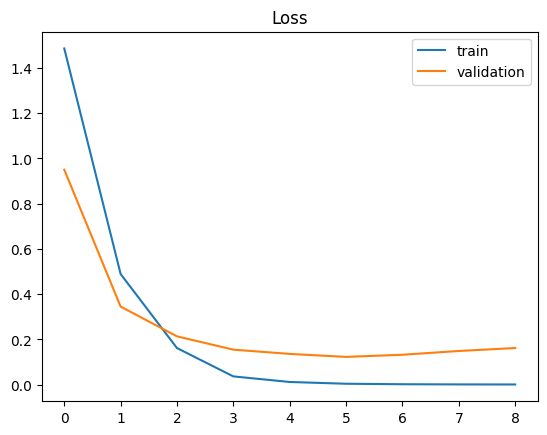

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

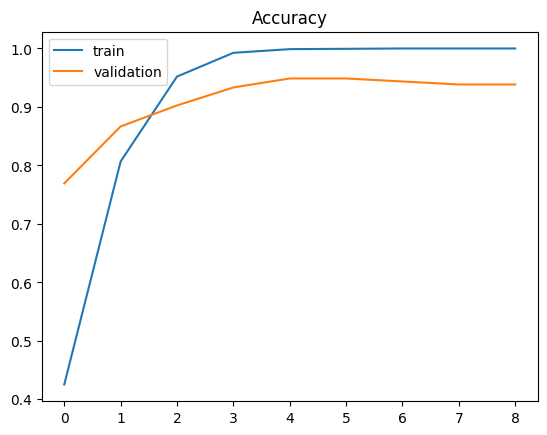

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
predictions = gru_model.predict(X_test)
predictions.tolist()

In [ ]:
labelsdf = pd.DataFrame(Y_test)

In [ ]:
ldf = pd.from_dummies(labelsdf)
ldf = ldf.values.tolist()
ldf

In [ ]:
Y_pred = predictions.argmax(axis=-1).tolist()
Y_pred

In [ ]:
from sklearn.metrics import classification_report

print()
print(classification_report(ldf, Y_pred, target_names=labels))
print()


              precision    recall  f1-score   support

       attar       1.00      0.92      0.96        13
       hafez       0.90      1.00      0.95         9
     moulavi       0.92      0.92      0.92        12
       saadi       1.00      1.00      1.00        10
      sanaee       0.80      0.80      0.80         5

    accuracy                           0.94        49
   macro avg       0.92      0.93      0.92        49
weighted avg       0.94      0.94      0.94        49




In [ ]:
from sklearn.metrics import f1_score
print(f'F1: {f1_score(ldf, Y_pred, average="weighted")}')

F1: 0.93890440386681


<Axes: >

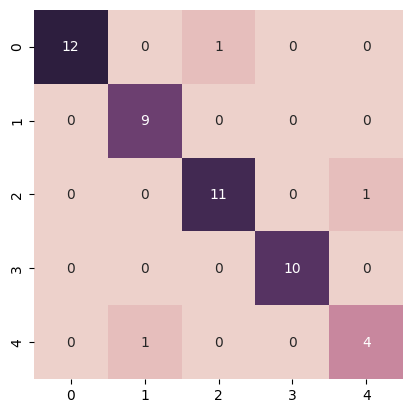

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ldf, Y_pred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)